# Global Power Plant Project

In [2]:
#import necessary librarise
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load dataset
df = pd.read_csv('global_Power_plant_database.csv')

In [4]:
print('No. of Rows:- ',df.shape[0])
print('No. of columns:- ',df.shape[1])
df.head()

No. of Rows:-  908
No. of columns:-  25


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

<b>Observation:-</b>

1.As we can see above there are 908 rows and 25 columns are there in our dataset.

2.Dataset having different datatype columns like onject, float.

3. other_fuel2, other_fuel3, wepp_id, estimated_generation_gwh are empty columns.

## Statistical Analysis

#### Before Going to stastical part we need to first we need to check missing value and integrity of data.

In [7]:
#Let's chack duplicate  value
df.duplicated().sum()

0

##### Let's check any whitespaces or NA or '-' is present in dataset or not

In [8]:
df.isin([' ','NA','-','?']).sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
other_fuel2                 0
other_fuel3                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
wepp_id                     0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source      0
estimated_generation_gwh    0
dtype: int64

<b>Observation:- </b>

There are no special characters like '-', 'NA' or white spaces.

#### Let's look at missing value

##### First we will remove empty value and non relevent columns which is not usefull for our further process.

##### Columns we will remove

estimated_generation_gwh - Empty

wepp_id - Empty

other_fuel2 - 98% data missing

other_fuel3 - Empty

owner - More than 60 % data missing

year_of_capacity_data - Missing data with single unique value

country - non relevalent info

country_long - non relevalent info

gppd_idnr -non relevalent info

url - No missing value but of no use

In [9]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                          Missing Values  % Missing data
estimated_generation_gwh             908      100.000000
wepp_id                              908      100.000000
other_fuel3                          908      100.000000
other_fuel2                          907       99.889868
other_fuel1                          709       78.083700
owner                                566       62.334802
generation_gwh_2013                  524       57.709251
generation_gwh_2014                  507       55.837004
generation_gwh_2015                  483       53.193833
generation_gwh_2016                  471       51.872247
generation_gwh_2017                  465       51.211454
generation_data_source               458       50.440529
year_of_capacity_data                388       42.731278
commissioning_year                   380       41.850220
longitude                             46        5.066079
latitude                              46        5.066079
geolocation_source             

As we mentioned before that so many columns having missing value as non-relevent colums also there so we will remove it for better accuracy.

In [10]:
#Droping unwanted columns
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [13]:
df.shape

(908, 15)

we droped almost 10 columns from the dataset which is non relevent for our analysis.


#### Proposed Strategy to Handle Missing data :

As Geolocation source is categorical data we can impute it with mode of category.
    
longitude and latitude can be impute with mean or median of longitude and latitude. This imputation will not distrub statstical balance of data as mean will be same at the end.
    
As commissioning year for most of industrial powerplant is missing(40%) after checking correlation we will decide to keep or drop this features.
                                                                   
In generation_data_source 50% data is missing and it doesnot have any importance in our analysis. So it is better to drop this feature.
                                                                   
<b>There are 5 Different columns of GenerationGW-Hours for year 2013 to 2017. Its dive into it further</b>
                                                                   
    It is important feature in for coal and hydro powerplant.
    
    It is natural to have missing data in this category. As Oil,Gas based Powerplant operated in intermitant periodic way and some renewable powerplant like wind,tide are operated seasonaly.
    
    Some new powerplant commission between 2013 and 2018. For these powerplant some data will definitely available.
    
    We cannot do any mean or median imputation here as different powerplant have different generation capacity & Generation per year depend on runtime of powerplant.
    
    We all know old powerplant normally kept off unless more demand of generation required. Reason to kept is low efficiency & high operating cost.
    
    We can neglect real value data for such important feature. We will keep this feature along with missing value and perform further investigation.
    
<b>Other_fuel1 is another feature of some importance with missing value. Lets dive into it :</b>
        
Not every powerplant build to work with alternate fuel.
        
Idea of other fuel is totally irrelevant to renewable energy source based powerplant like solar,wind,hydro.
        
First talk about powerplant for which concept of other fuel is applicable. We can impute them based domain knowledge.
        
Alternate Fuel of Coal based powerplant mostly is Oil or cogeneration.
    
Alternate Fuel of Industrial Oil based powerplant is Gas.
    
Alternate Fuel of Industrial Gas based powerplant is Oil.
    
We cannot define any alternative fuel for nuclear powerplant as it sole based on plant design & so many option.
For Renewable energy source based powerplant no alternate fuel needed. As it is categorical feature we can impute these powerplant with "Not Applicable". At end we are going Encoding these labels, 'Not Applicable' will be just one other additional label in encoding. Making no alternation on final result.

#### Missing value Imputation

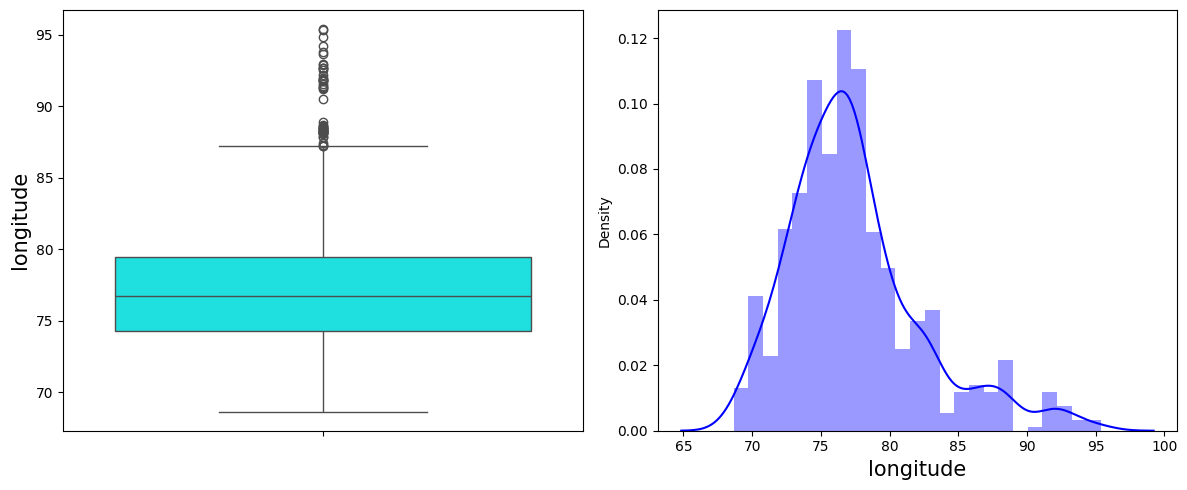

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

##### Based on presense of outliers we will impute longitude we with median

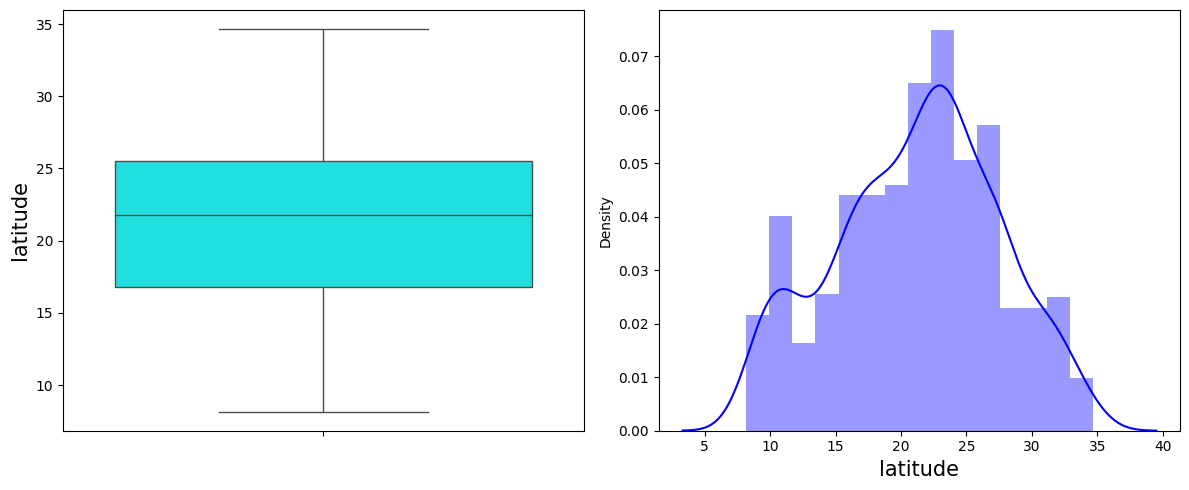

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

##### Based on absense of outliers we will impute latitude we with mean.

In [16]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())

# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [17]:
#Finding what percentage of data is missing from the dataset

missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.083700
generation_gwh_2013                524       57.709251
generation_gwh_2014                507       55.837004
generation_gwh_2015                483       53.193833
generation_gwh_2016                471       51.872247
generation_gwh_2017                465       51.211454
generation_data_source             458       50.440529
commissioning_year                 380       41.850220
name                                 0        0.000000
capacity_mw                          0        0.000000
latitude                             0        0.000000
longitude                            0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000
geolocation_source                   0        0.000000


## Statistical Analysis

In [18]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.410936,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.783873,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.278850,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.183775,79.211600,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


<b>Comment:-</b>

Bigest Powerplant has power generation capacity of 4760 MW.

In each Generation-GWHours columns Mean is greater than Median.
    
Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.

Oldest powerplant commission date back to 1927 and most recent powerplant is build in 2018. We will check in which timeframe most of powerplants are commission.

Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.

##### We have two different Target feature for regression and classification model. LetStart exploring both Target Feature

## Regression Target feature - Capacity

##### Before visualing feature let find details about Smallest & Biggest Powerplant

In [19]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [20]:
#To see the index 
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
881,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,26761.39,27594.0,29047.0,30015.0,35116.0,Central Electricity Authority


In [21]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
830,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


<b>Observation:- </b>

1. Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. This must be data entry error as If powerplant is commission it cannot have capacity of 0 MW.

2. Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW. As Name suggest it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.

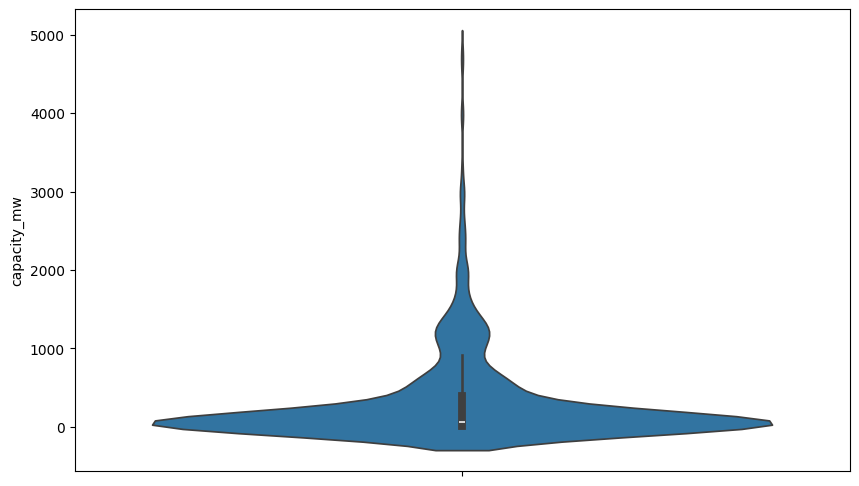

In [24]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

###### We can see there are very powerplant of capacity more than 1500 MW. Let check

In [25]:
df.loc[df.capacity_mw >1500].shape


(37, 15)

##### There only 15 powerplant of capacity more than 1500 MW.

In [26]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

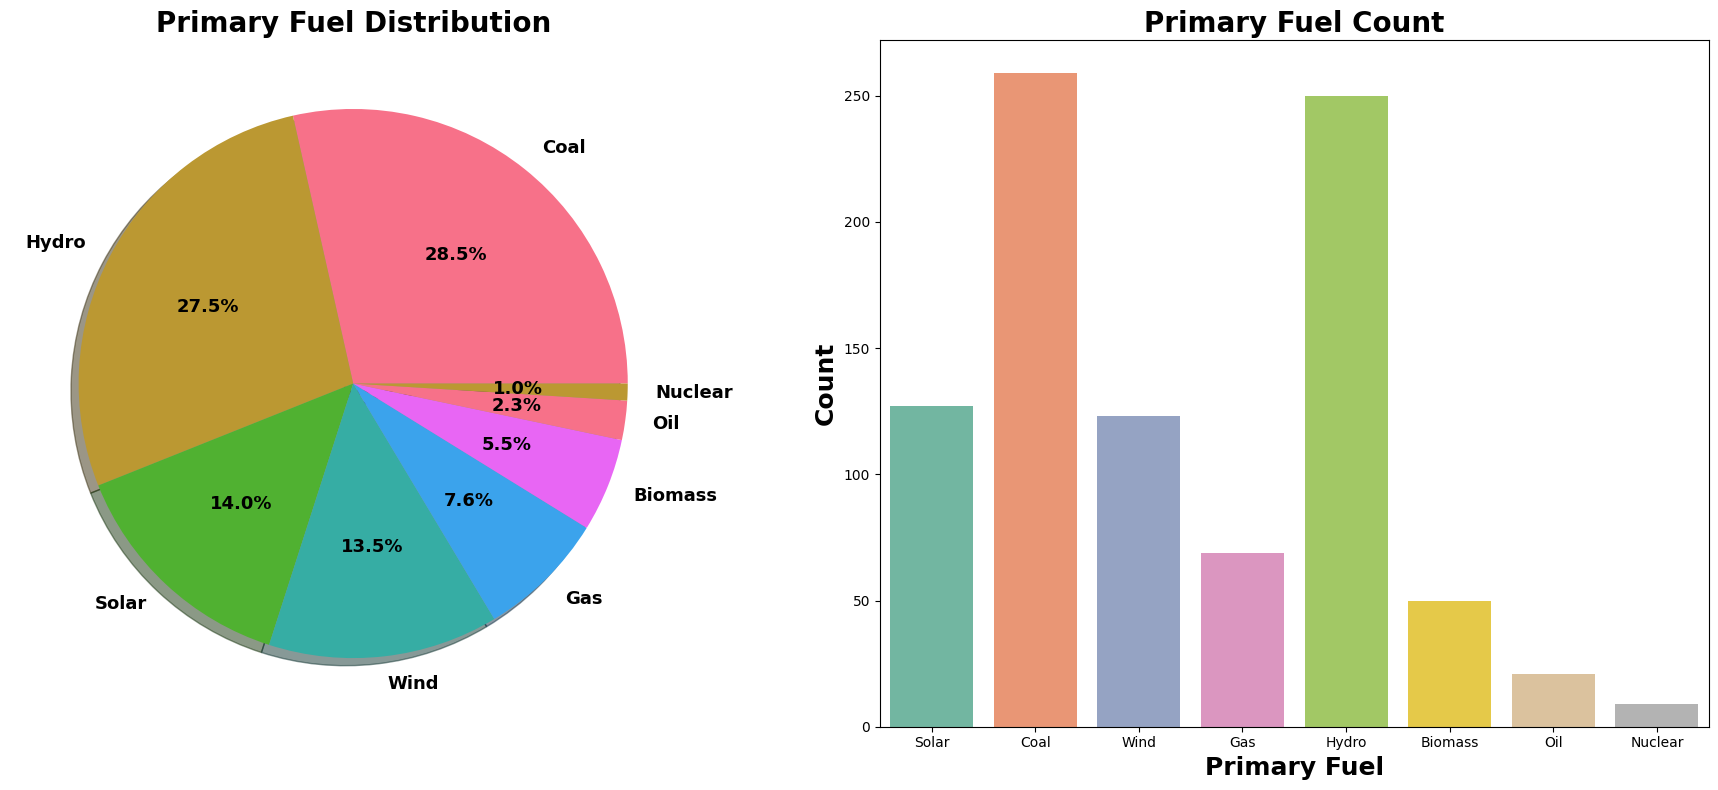

In [30]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
df['primary_fuel'].value_counts().plot.pie(autopct='%1.1f%%',
                                           textprops={'fontweight': 'bold', 'fontsize': 13}, 
                                           ax=ax[0], shadow=True)
ax[0].set_title('Primary Fuel Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='primary_fuel', data=df, ax=ax[1], palette='Set2')
ax[1].set_title('Primary Fuel Count', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Primary Fuel", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=18, fontweight='bold')

plt.show()


In [31]:
df.primary_fuel.value_counts()

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64

<b>Observation:-</b>

1. There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity. It will be interesting to look for capacity of these powerplant.

2. Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.
                                                                                                                        
3. Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.                                                                                                                        2.

##### Let find Total Generation capacity of all powerplant, afterwards we will look for capacity of powerplant according to fuel type.

In [33]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 291510.11100000003 MW


#### India's Total Power Generation Capacity of is 291510.11 MW.

Now Let check sector wise Capacity.

In [34]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,201423.220
Gas,25123.871
Hydro,46331.570
Nuclear,8780.000
Oil,1978.840
Solar,2757.500
Wind,4111.850


<b>Observation:-</b>

<b>Out of Total PowerGeneration Maximum comes from Coal.</b>

Here comes another interesting observation which we already suspected. Overall Power Generation capacity of Nuclear powerplants is greater than Unconventional Energy sources based powerplant (biomass, wind,solar) combined.

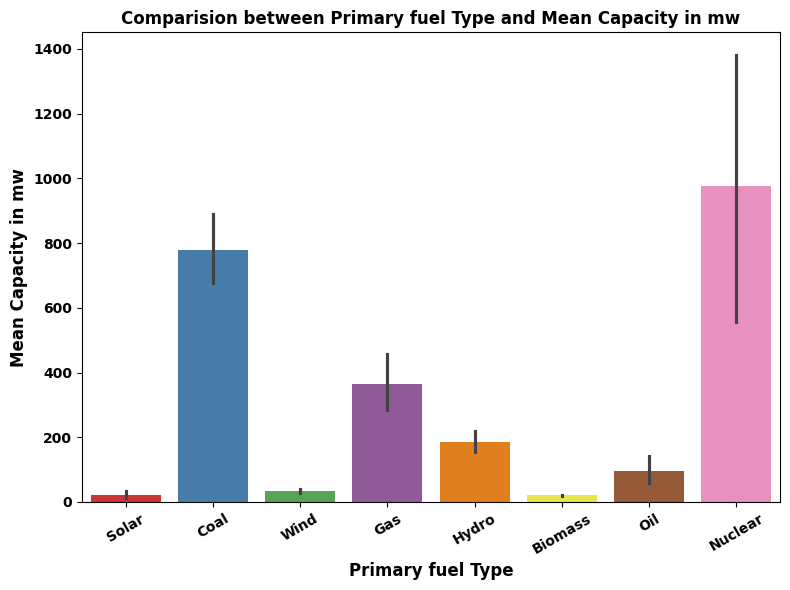

In [42]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (8,6))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df, palette='Set1')
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=12, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=12,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=12,fontweight ='bold')
plt.xticks(fontsize=10,fontweight ='bold',rotation=30)
plt.yticks(fontsize=10,fontweight ='bold')
plt.show()

#### Above result is obvious as only 9 Nuclear powerplant so its mean Capacity is higher.

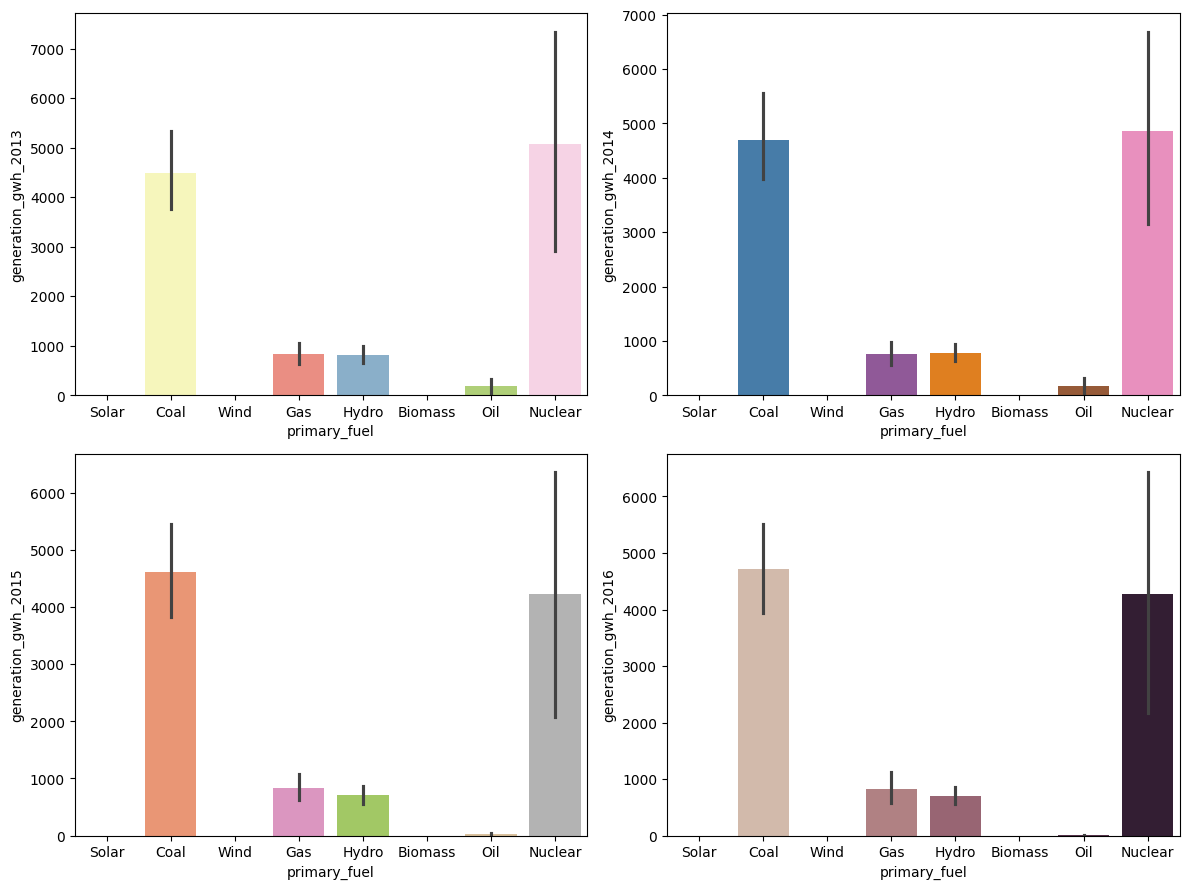

In [44]:
fig,axes=plt.subplots(2,2,figsize=(12,9))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=df, palette="Set3")

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df, palette="Set1")

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")

plt.show()

<b>Comment:- </b>

1. From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal. Reason is high efficieny of Nuclear powerplants.

2. Other fuel types have very less contribution to power generation.

### Location vs Primary Fuel

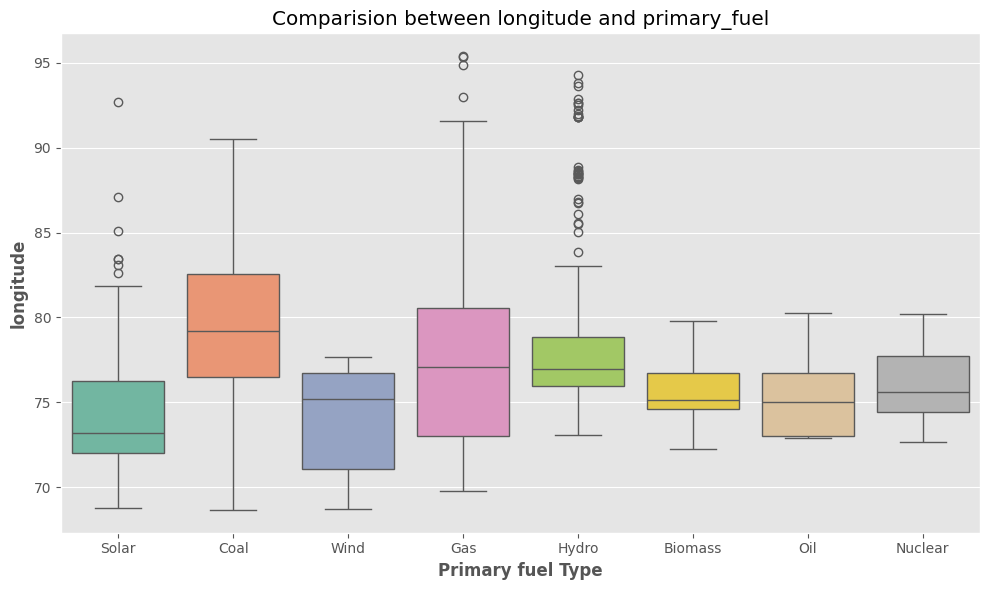

In [49]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')

a = sns.boxplot(x = df['primary_fuel'],y = df["longitude"], palette='Set2')
a.set_xlabel('Primary fuel Type',fontsize=12,fontweight ='bold')
a.set_ylabel('longitude',fontsize=12,fontweight ='bold')

plt.show()

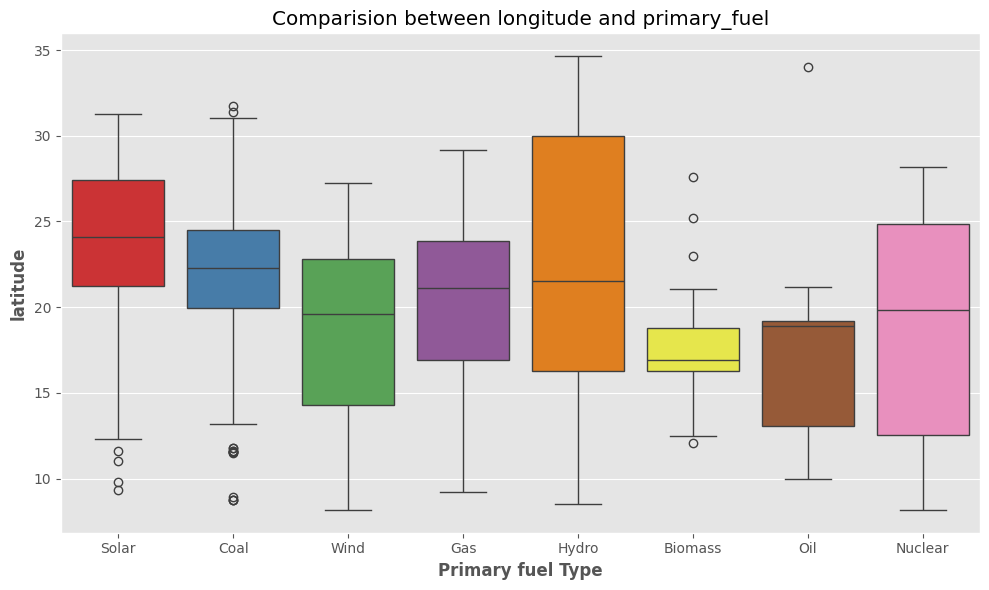

In [53]:
# Let's check how the primary_fuel is reated to Latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')

a = sns.boxplot(x = df['primary_fuel'], y = df["latitude"], palette = 'Set1')
a.set_xlabel('Primary fuel Type',fontsize=12,fontweight ='bold')
a.set_ylabel('latitude',fontsize=12,fontweight ='bold')

plt.show()

<b>Comment:</b>

1. Location is important feature specially for Nuclear powerplants. These plants lies in between 15 to 25 latitude and longitudnal range of 75 to 88 degree.
    
2. We can also see solar power plant are mostly establish in certain range of latitude and longitude. This might be due to clear and intense sunlight with minimum humidity.

#### Commission age vs primary fuel

In [54]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [55]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [56]:
df.loc[df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,Power_plant_age
729,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,217.97465,220.82035,215.3777,144.4143,175.92595,Central Electricity Authority,91.0


##### Oldest Powerplant is SIVASAMUNDRUM which is hydro power based plant with generation capacity of 42 MW.

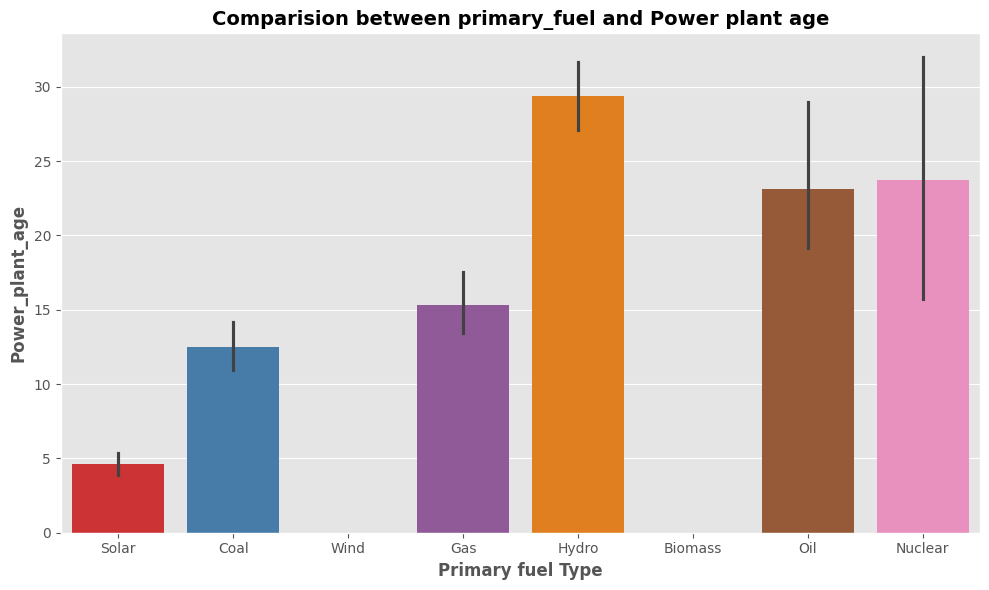

In [60]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=14, fontweight='bold')

a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set1")
a.set_xlabel('Primary fuel Type',fontsize=12,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=12,fontweight ='bold')

plt.show()

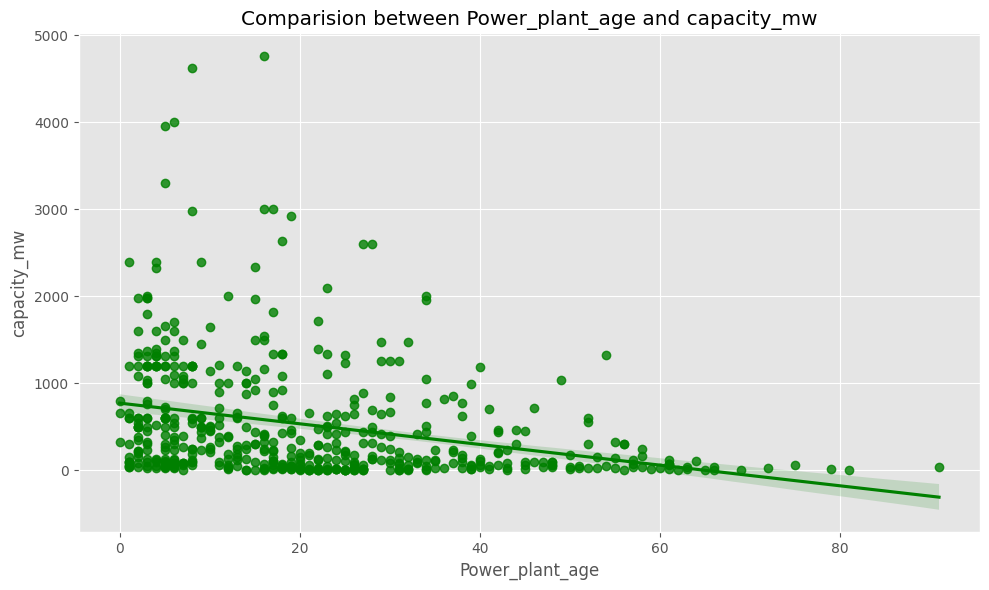

In [63]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')

sns.regplot(x = df['Power_plant_age'], y = df['capacity_mw'],color = "g")

plt.show()

1. There is negative linear relationship between feature and label.

2. We can say that the capacity of older plants is very less than compared to the powerplants which are stated recently.

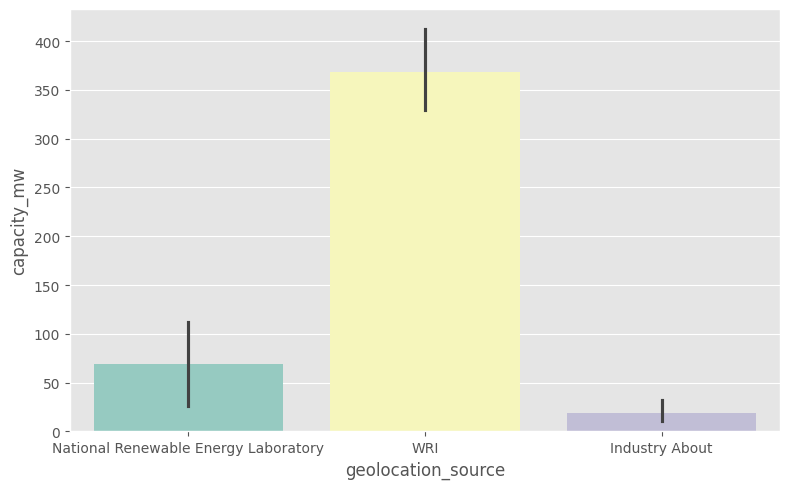

In [66]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (8,5))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df, palette = 'Set3')

plt.show()

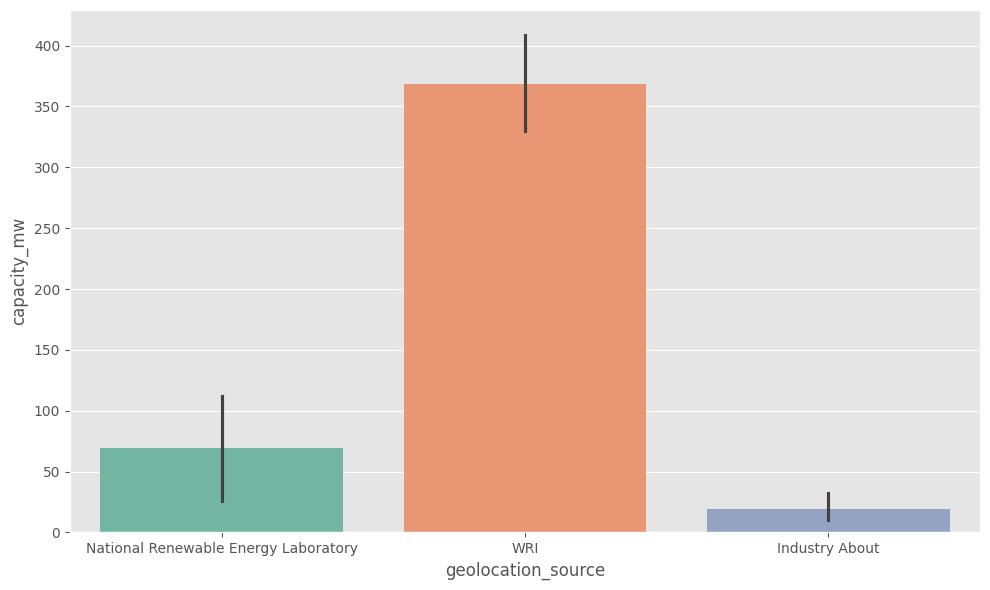

In [69]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df, palette = 'Set2')

plt.show()

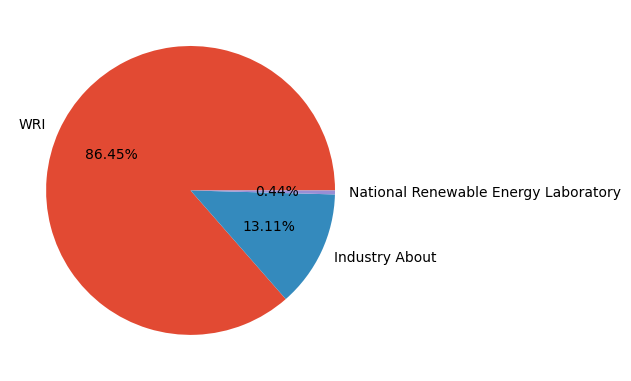

In [70]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False)

plt.show()

The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source Industry About has less capacity.

### Distribution of features

In [72]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

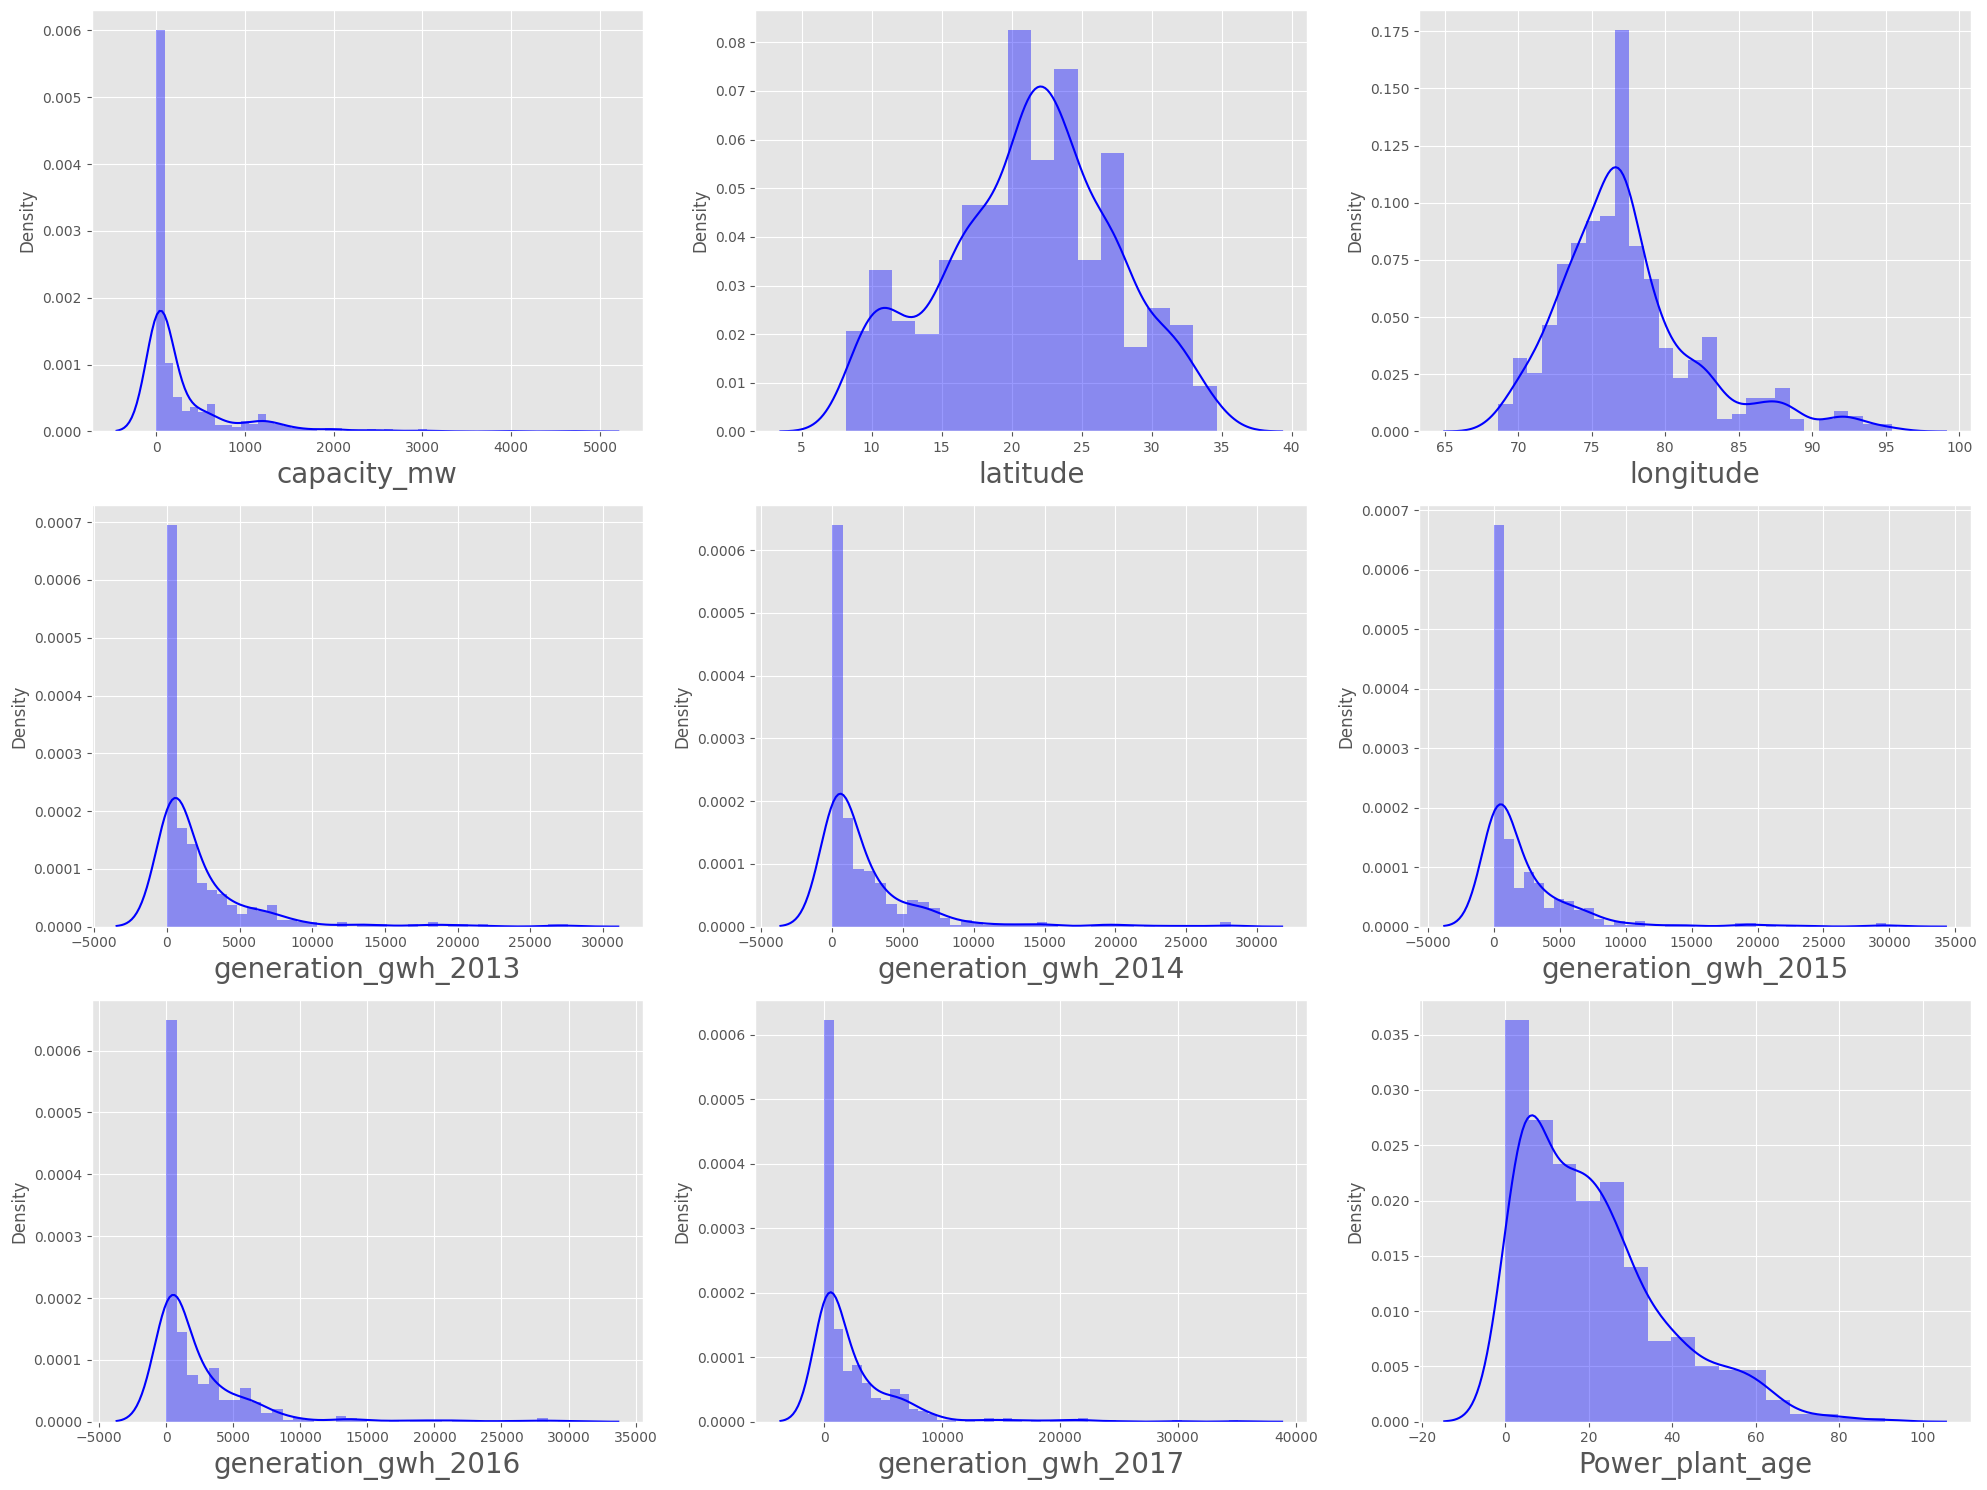

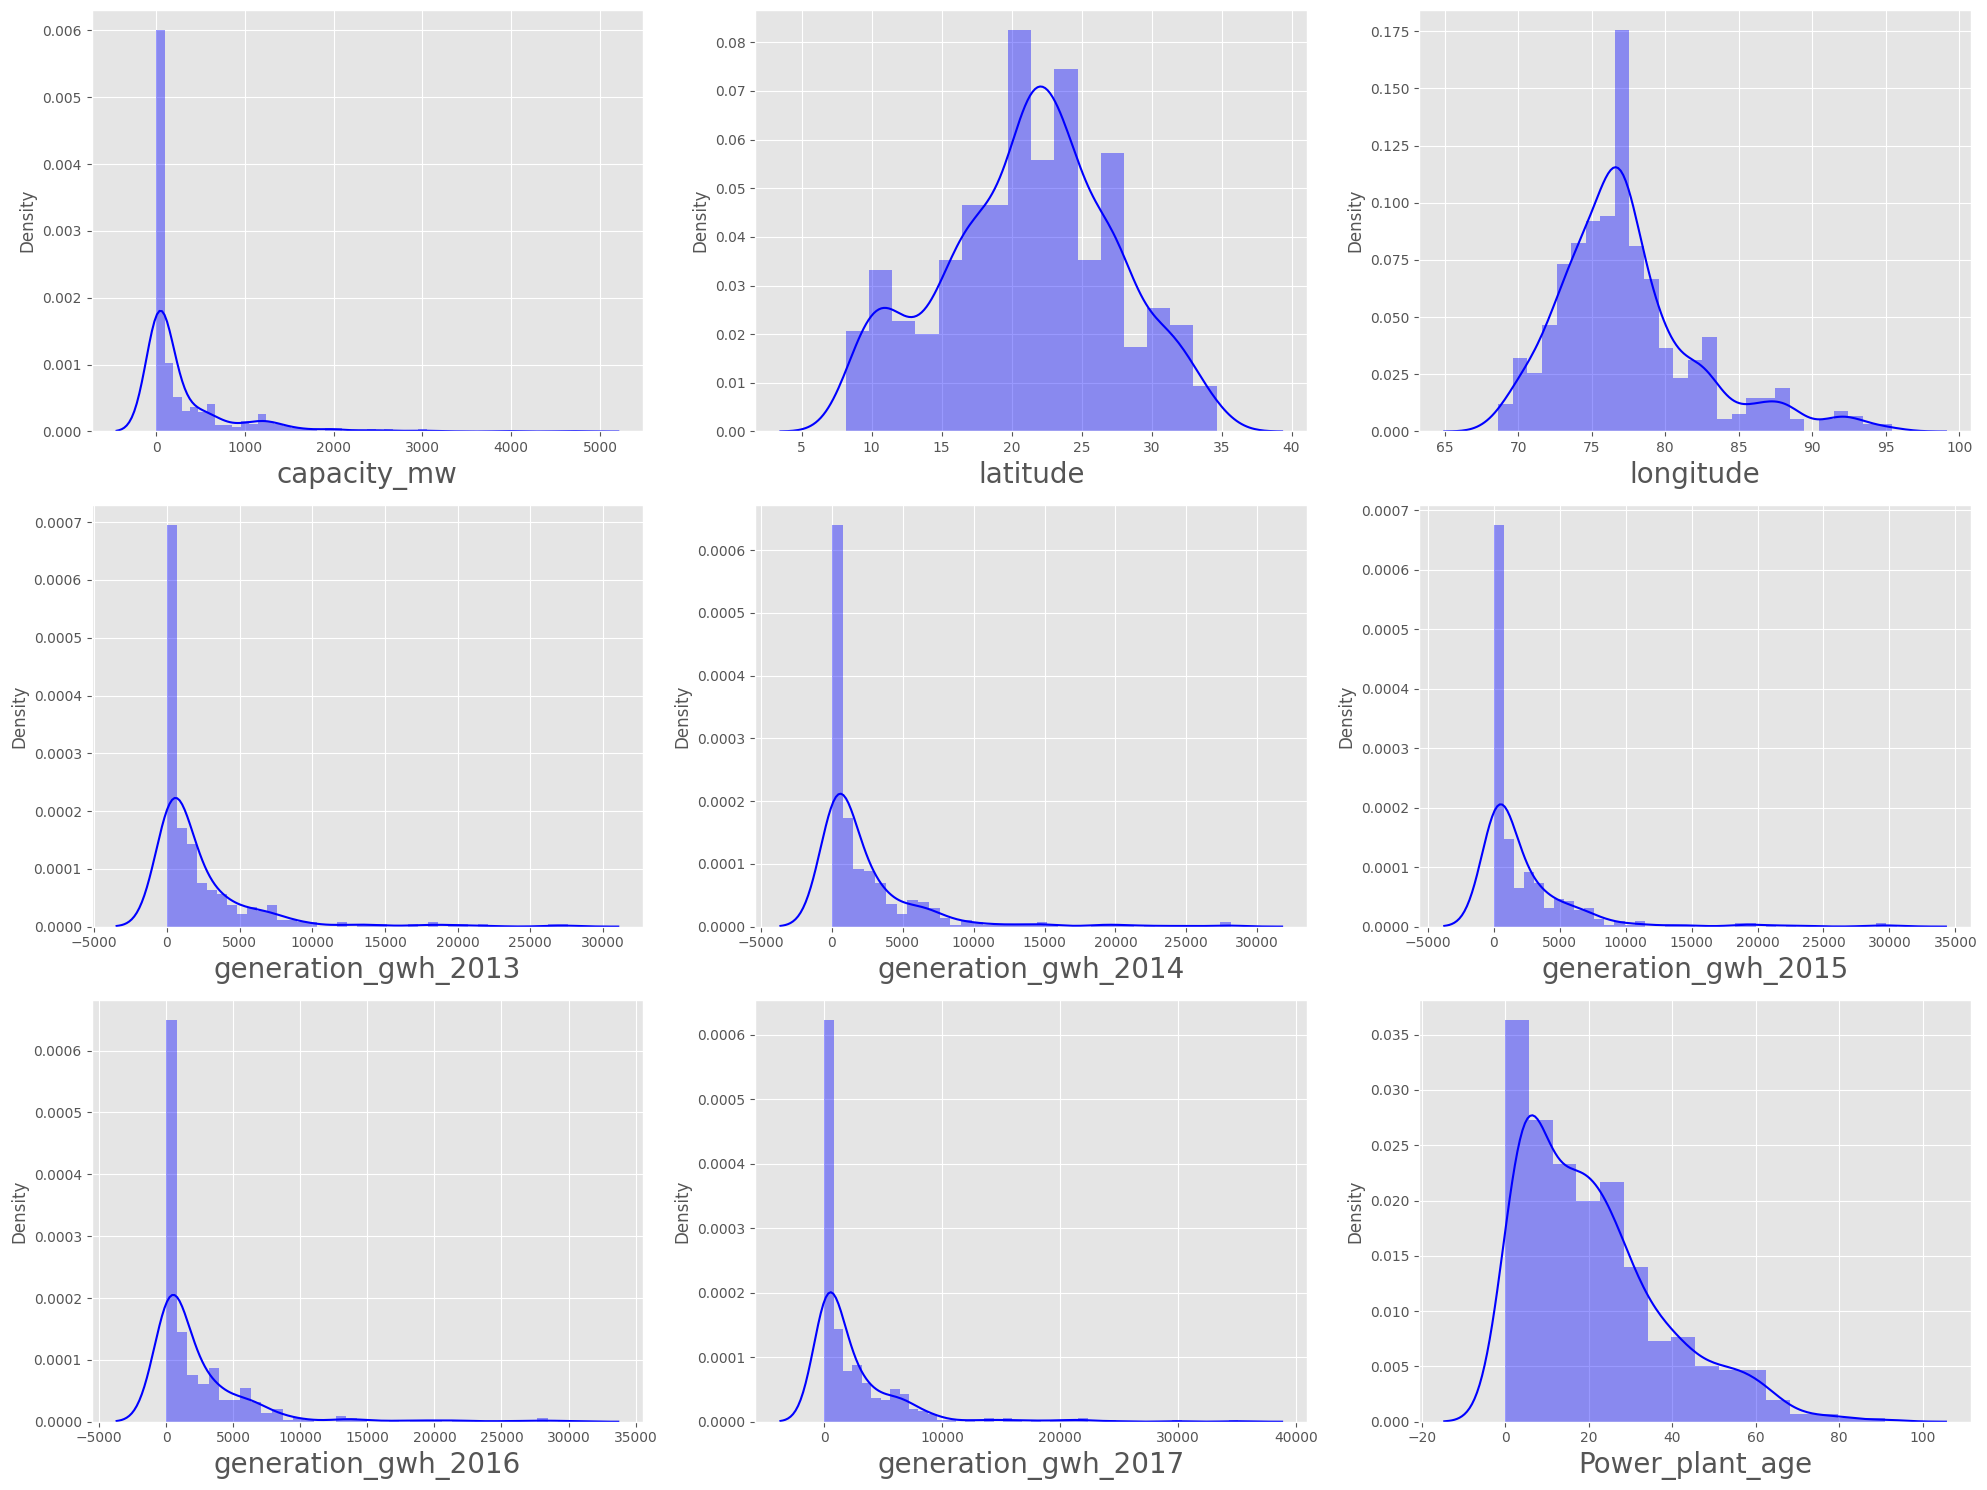

In [74]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

<b>Observation:-</b>
1. From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude.

2. In most of the columns the mean is greater than the median which means they are skewed to right.

3. We will remove the skewness in all these columns except the label later.

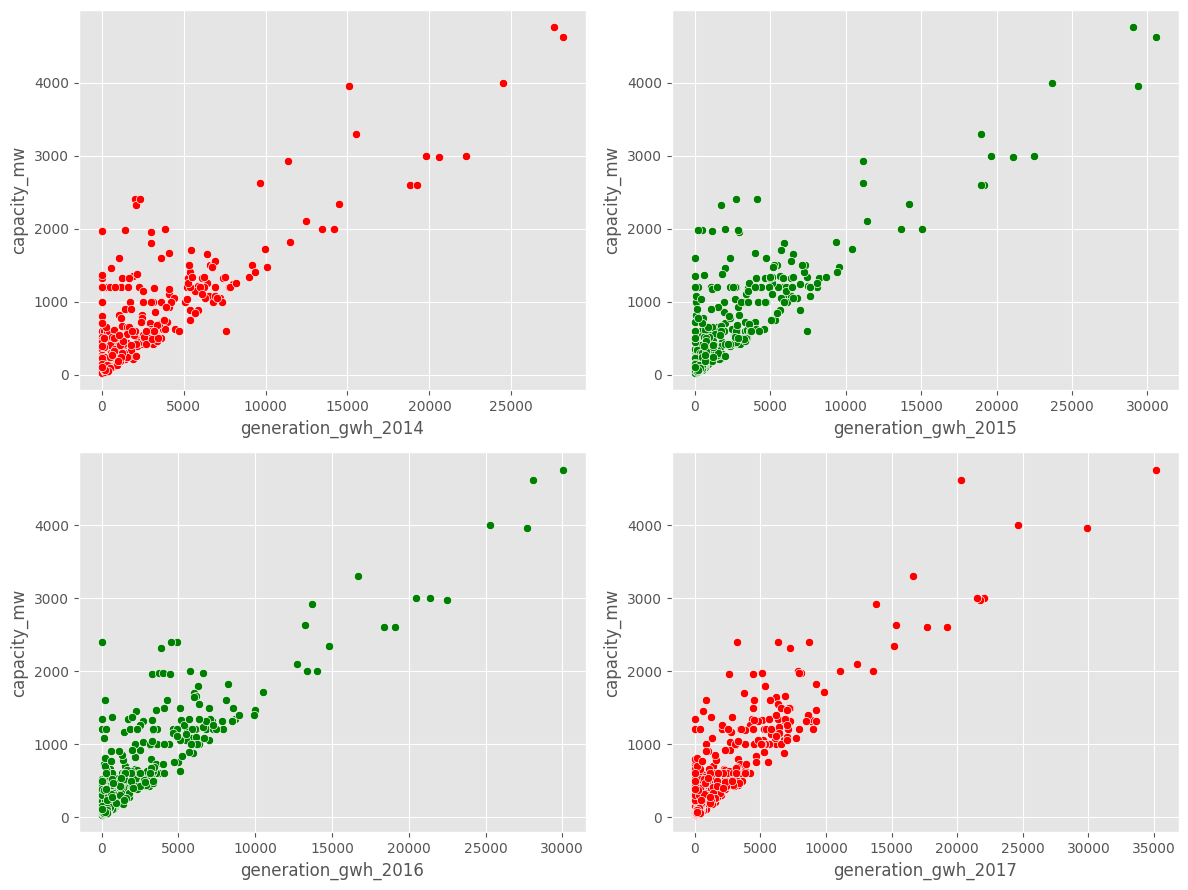

In [78]:
fig,axes=plt.subplots(2,2,figsize=(12,9))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="r")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="g")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")

plt.show()

<b>Comment:-</b>
1. There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.

2. The plot shows the electricity generation reported for the years 2014,2015,2016,2017 have high capacity of above 1000mw. Also the power generation growth is more than 5000gwh in all the years.

3. As the electricity generation growth increases, the capacity of plant also increases.

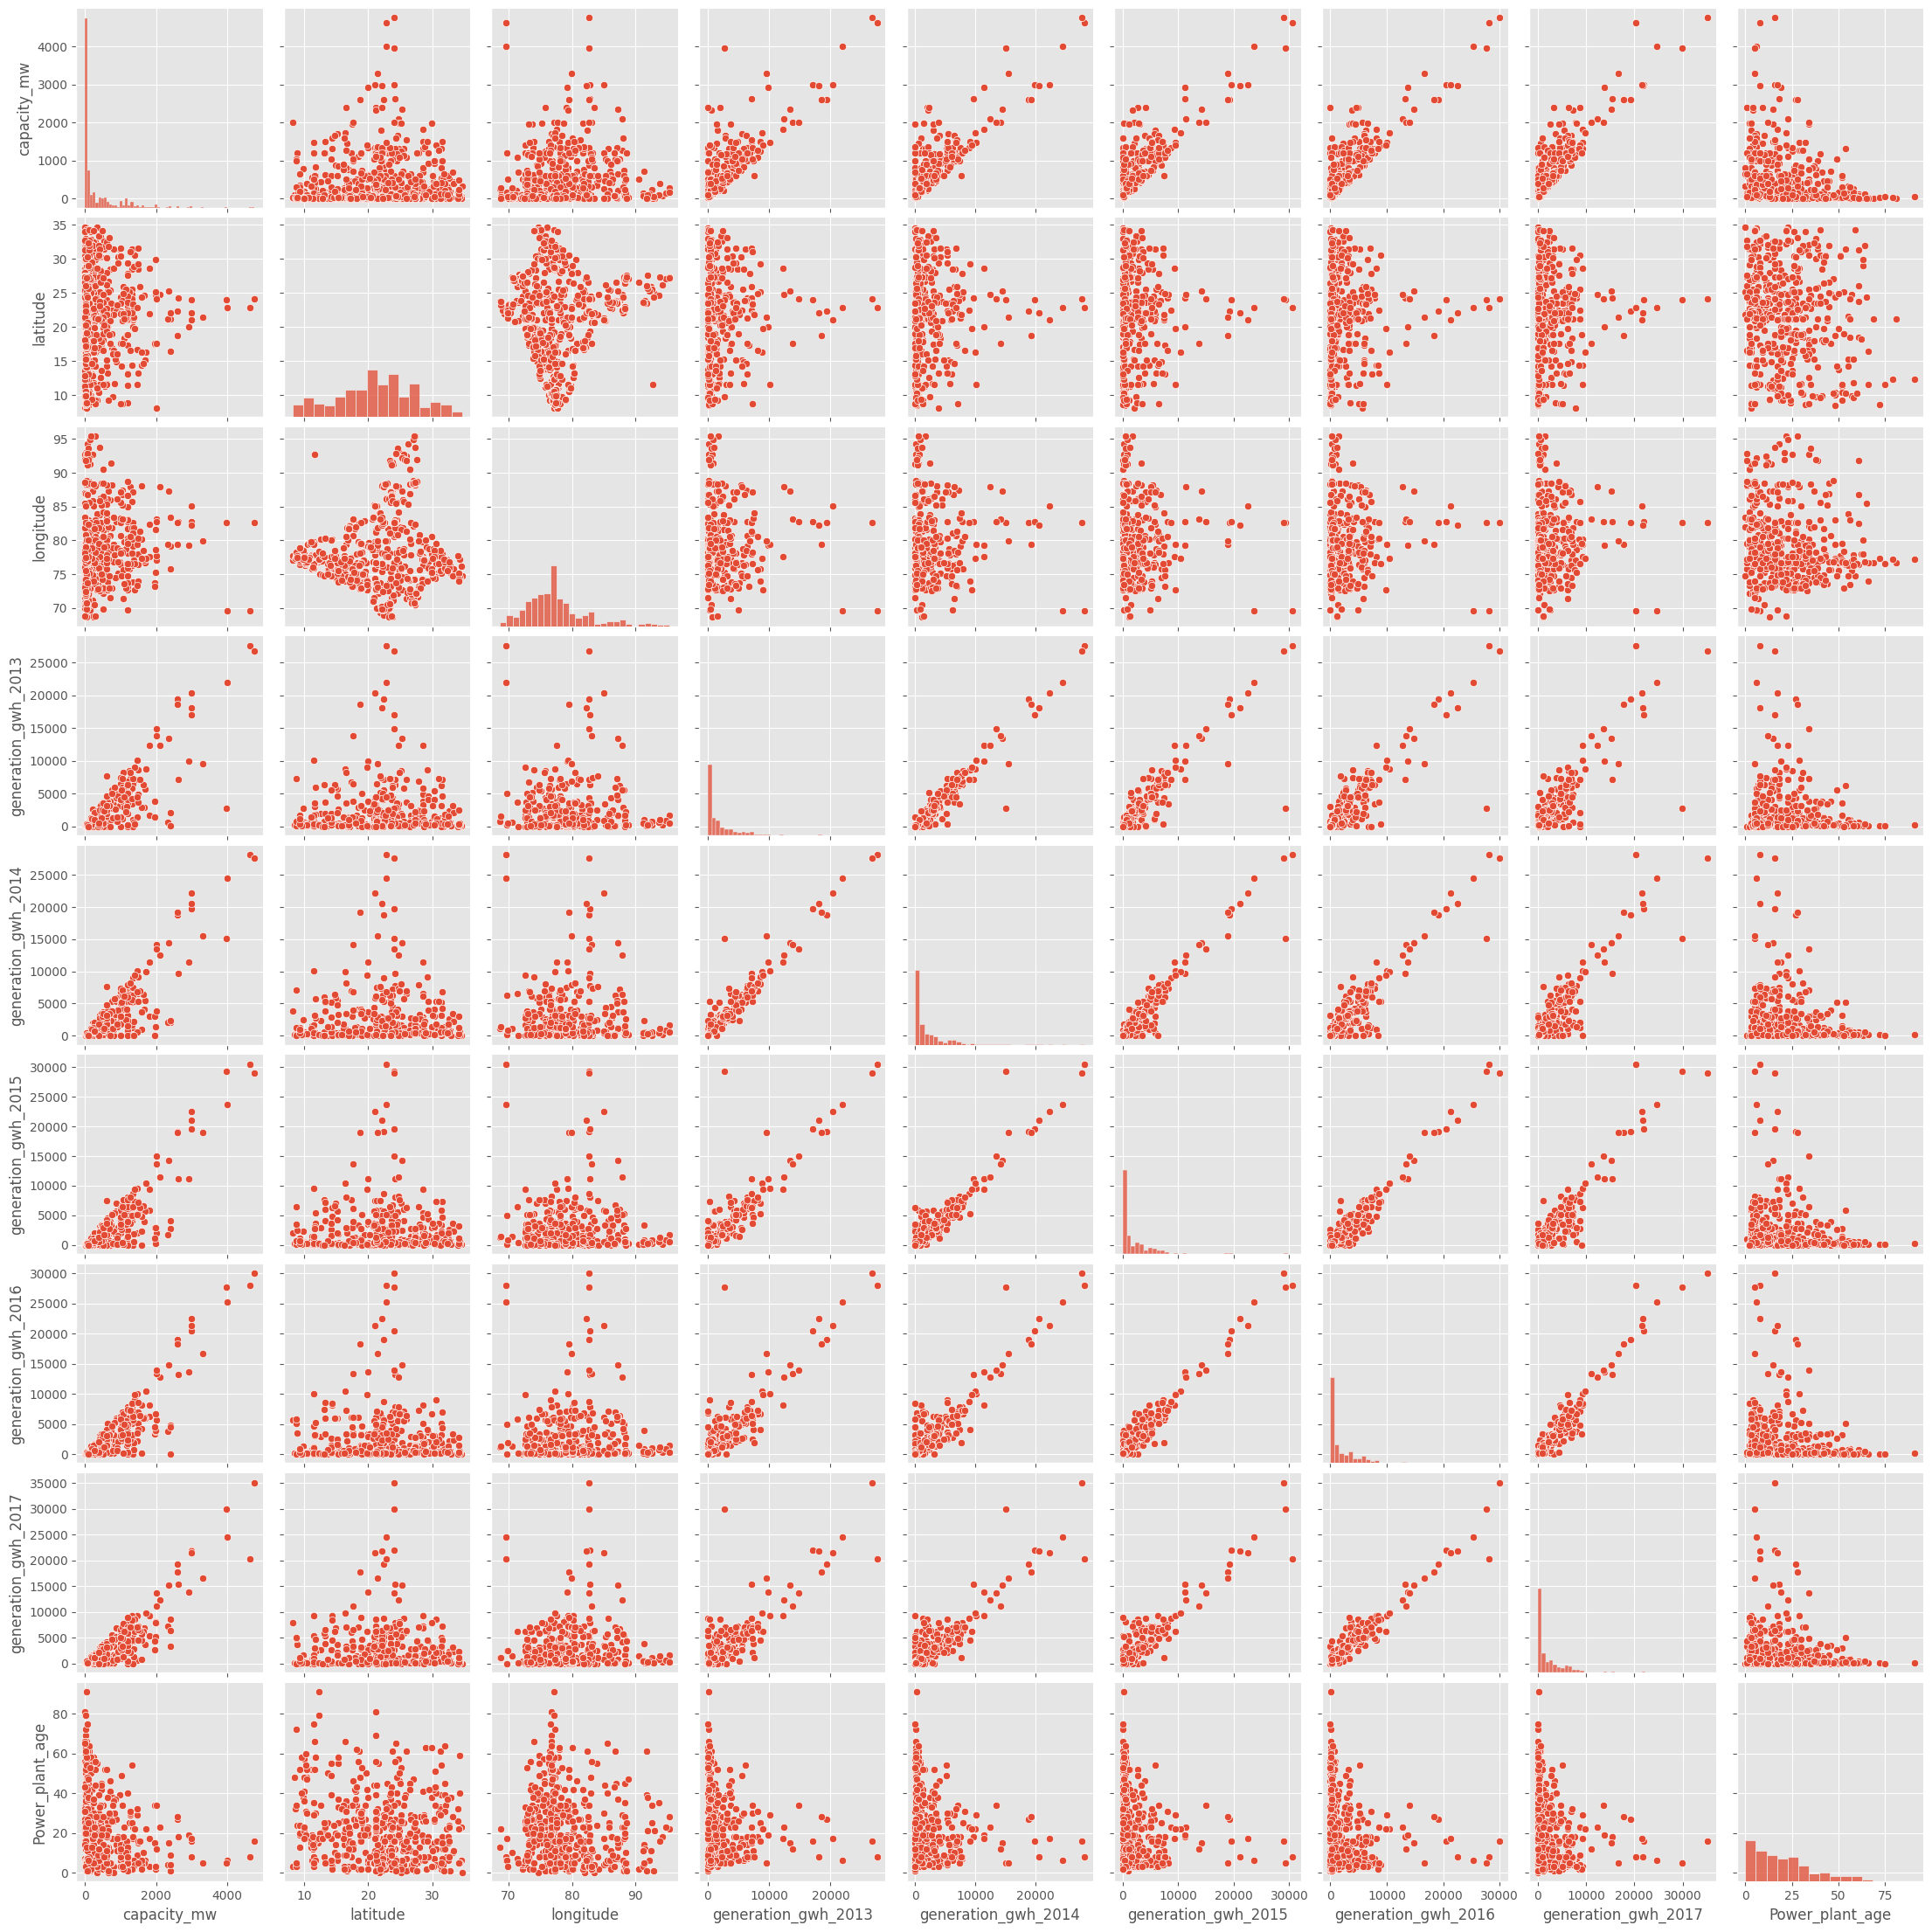

In [81]:
#Checking the pairwise relation between the features and label capacity in megawatt.

sns.pairplot(df)
plt.show()

<b> Observation:- </b>
1.Most of the features have strong linear relationship and correlation with each other.

2.From the plot we can observe the outliers in some of the columns.

3.We can see histogram on the diagonal.

### Encoding categorical data

In [82]:
df.drop(columns=['name'],axis=1,inplace=True)

In [83]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)


In [84]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [85]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in Category:
    df[c] = le.fit_transform(df[c])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,631.777928,617.789264,843.747,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,3.0


## Outliers detection and removal

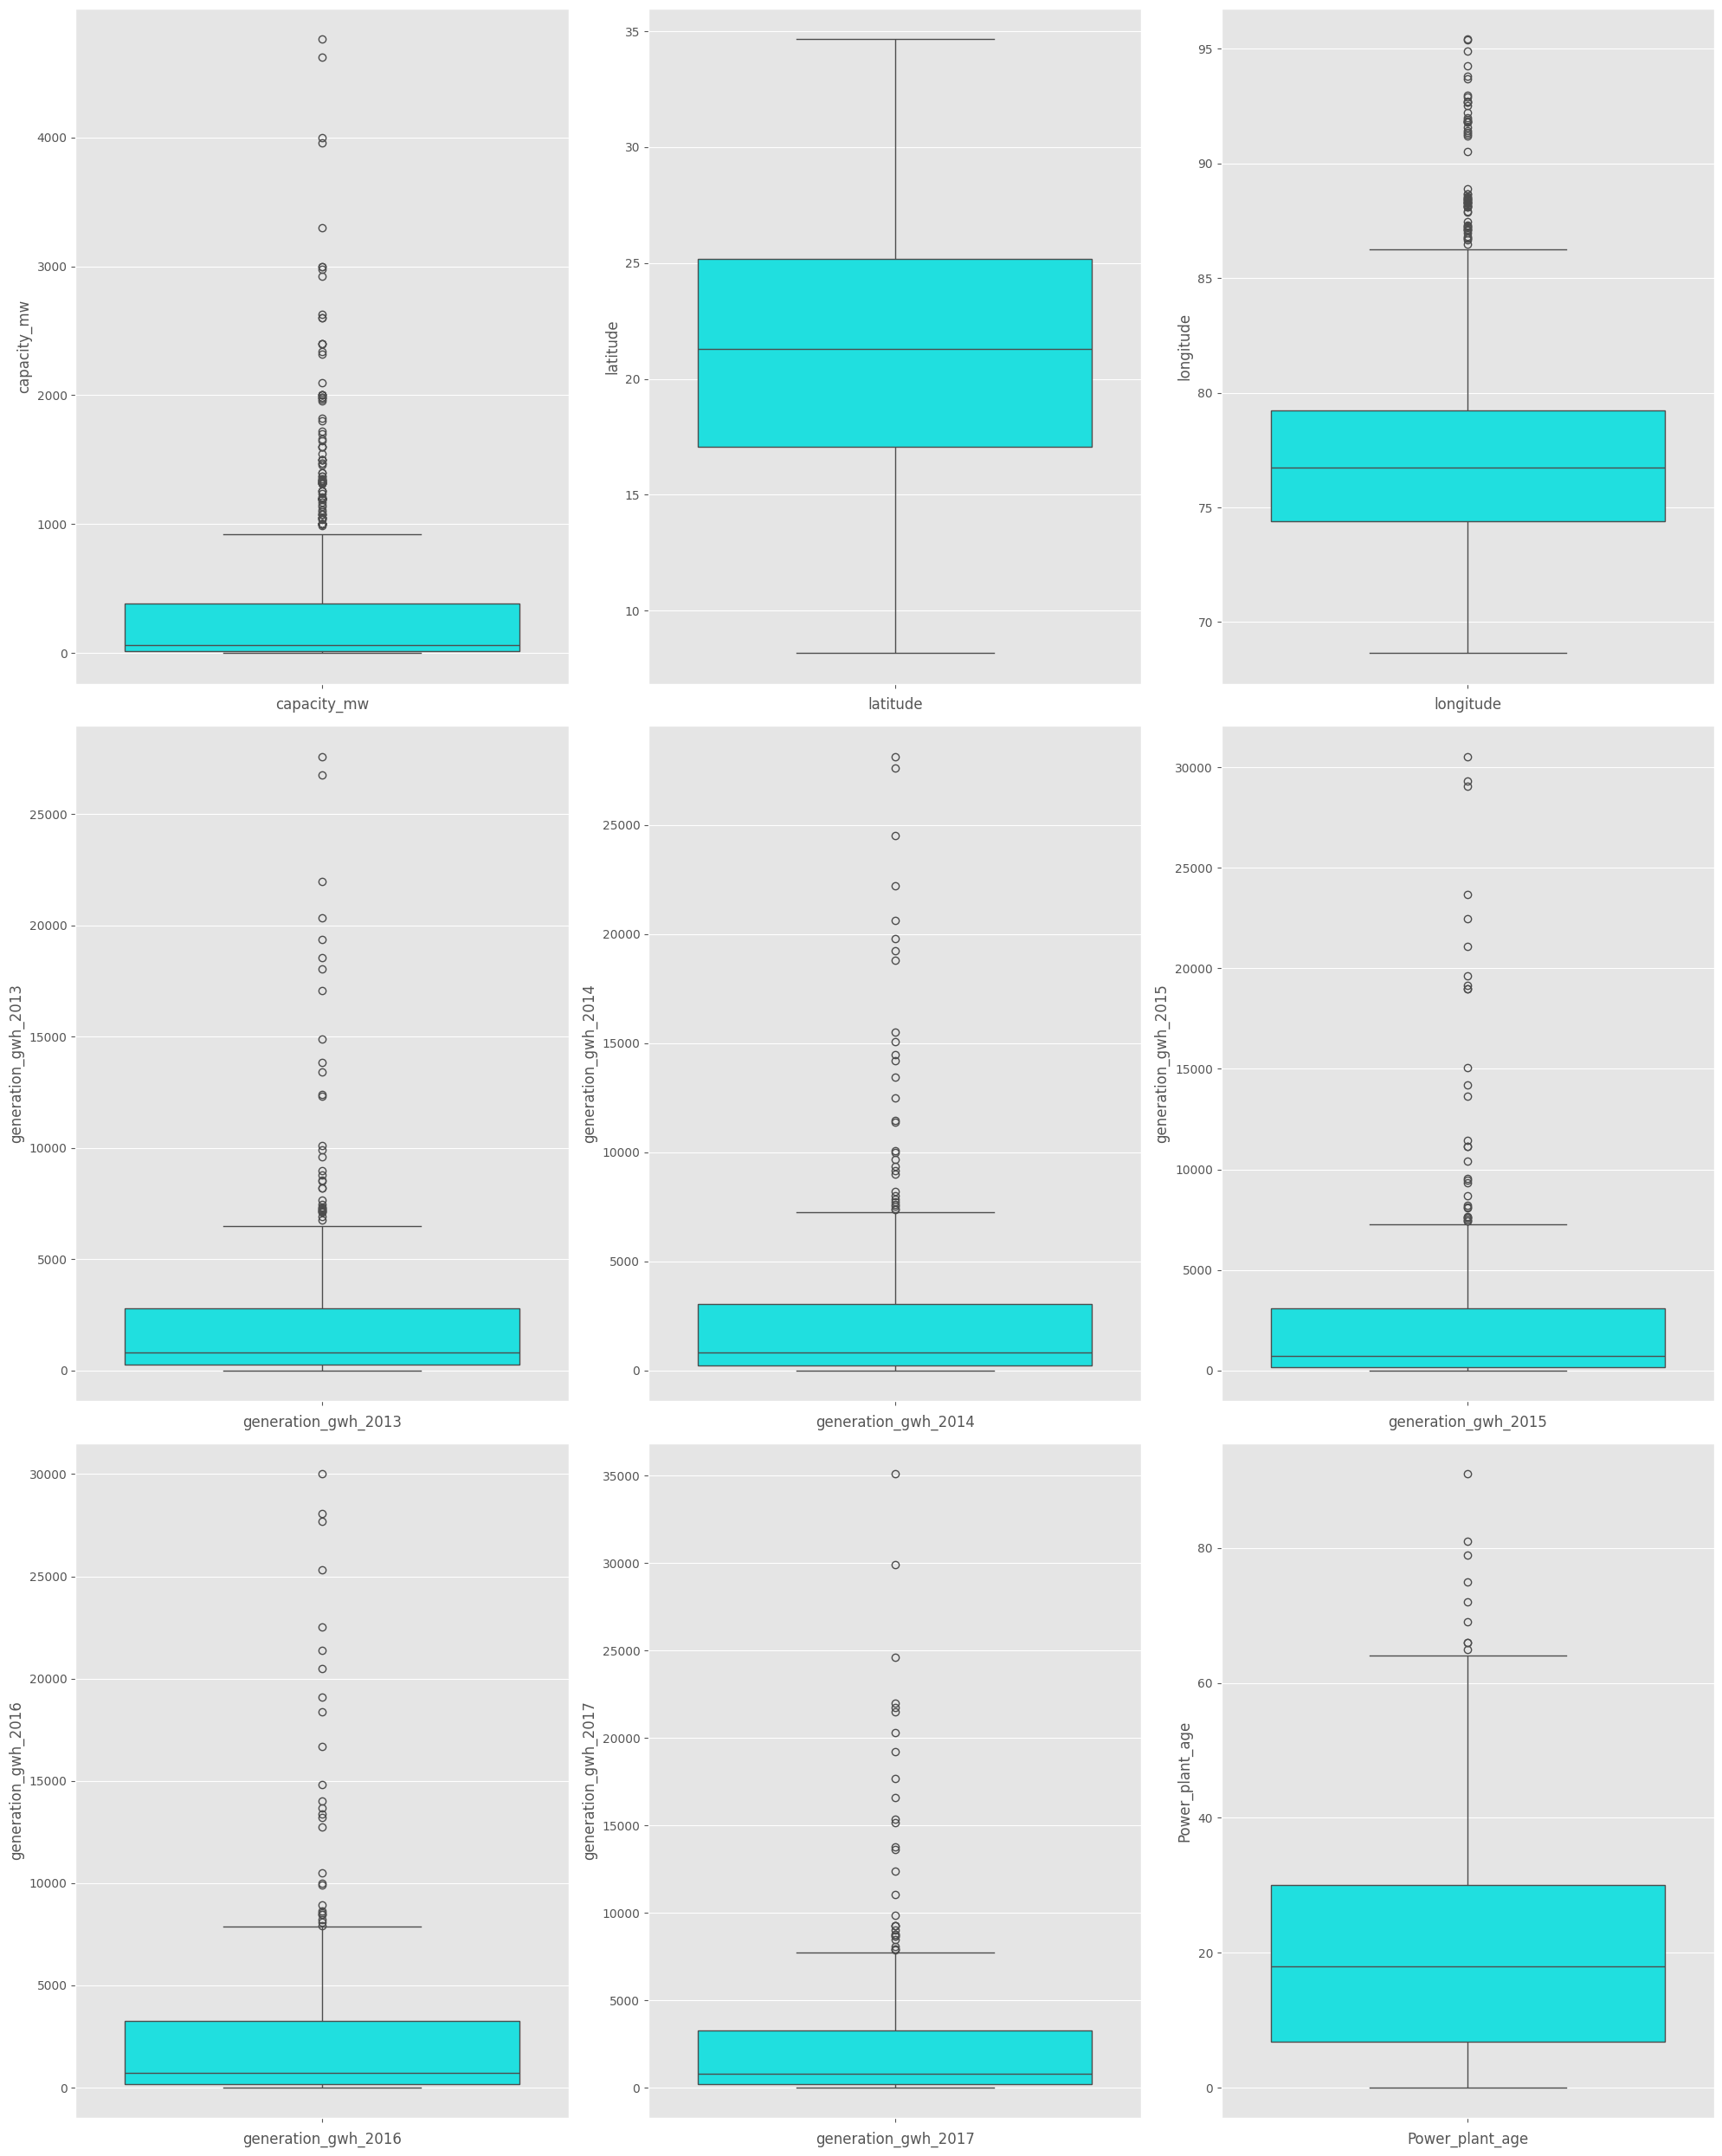

In [88]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()
plt.show()

<b>Observation:- </b>
1. There outliers exist in data.

2. There are no outliers in lower capping level.

3. So we will use Quantile-based Flooring and Capping technique.

##### Further outliers investigation will be done bases Quantile-based Flooring and Capping technique. In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values

In [90]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [104]:
df2 = df.copy()

In [107]:
df2

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,28.1839,73.2407,6,3,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,631.777928,617.789264,843.747000,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,1,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.0
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,NaN,NaN,0.994875,233.596650,865.400000,2.0
904,3.0,12.8932,78.1654,6,3,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,7,3,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,1,3,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             660.000000
latitude                 19.212970
longitude                13.258160
primary_fuel              6.000000
other_fuel1               3.000000
generation_gwh_2013    4600.499035
generation_gwh_2014    5260.710000
generation_gwh_2015    5078.485600
generation_gwh_2016    5200.793260
generation_gwh_2017    5610.347700
Power_plant_age          39.000000
dtype: float64


In [109]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(876, 11)


#### Data Loss

In [110]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


#### Correlation matrix

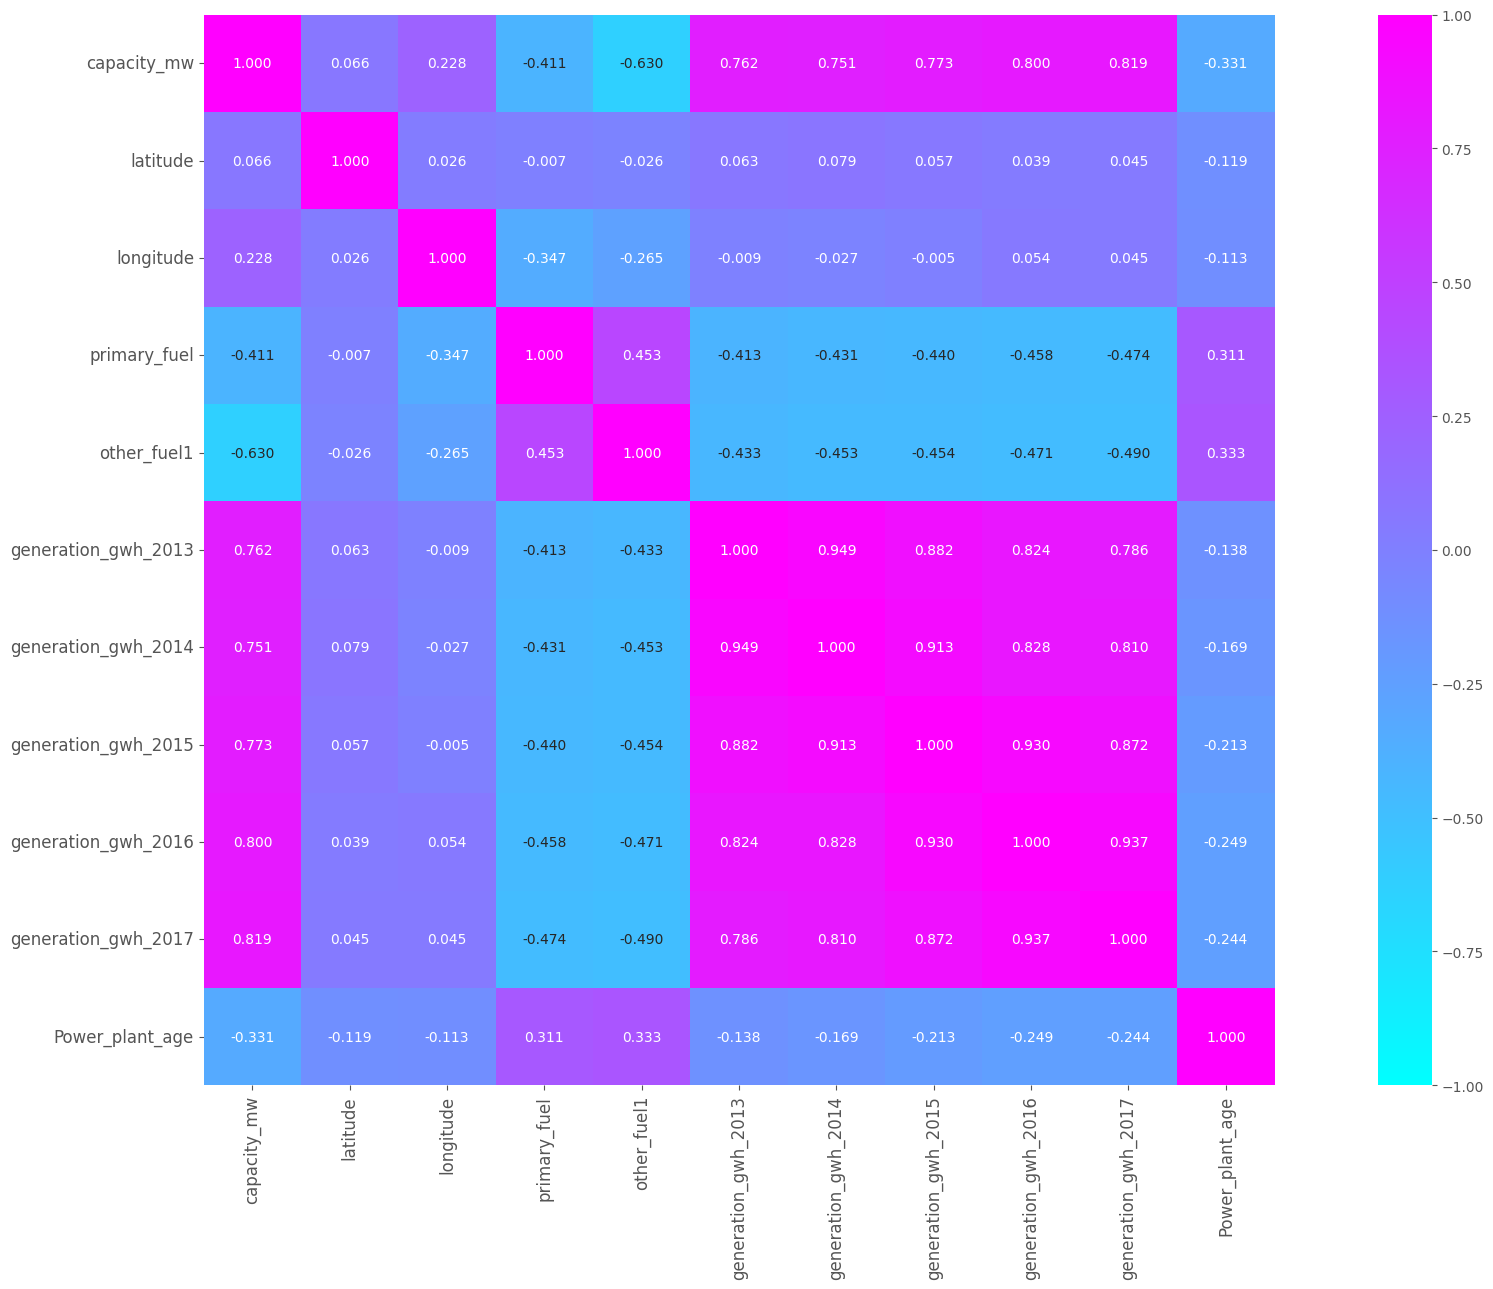

In [111]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

1. The label capacity_mw is highly positively correlated with the features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2013.

2. Capaity is negatively correlated with the features primary_fuel, source and Powe_plant_age.

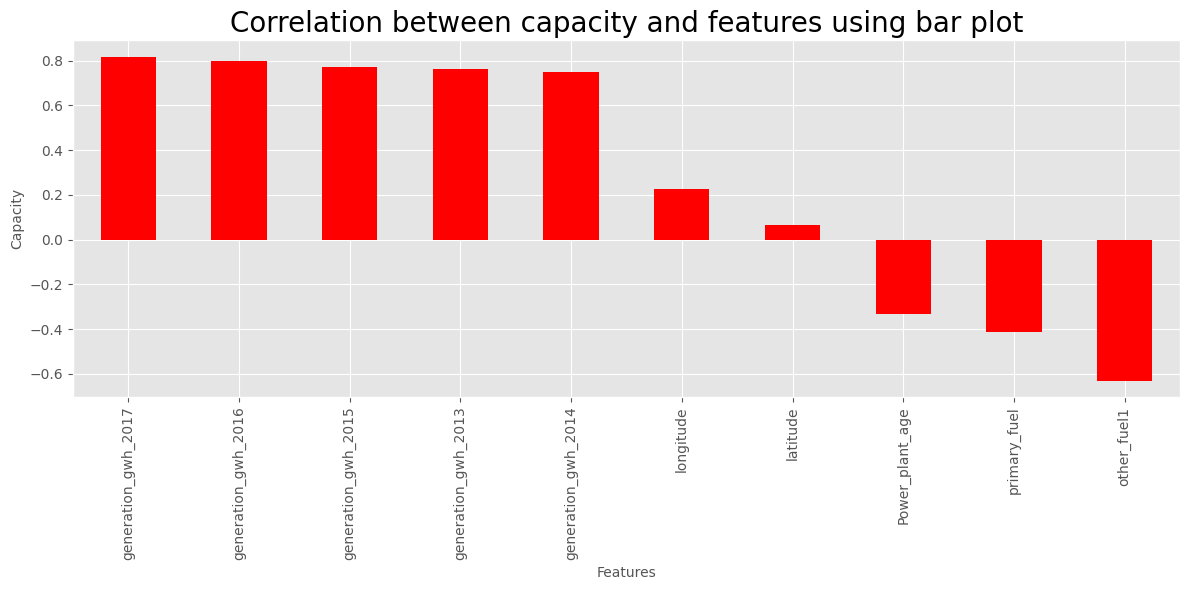

In [114]:
plt.figure(figsize=(12,6))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='r')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

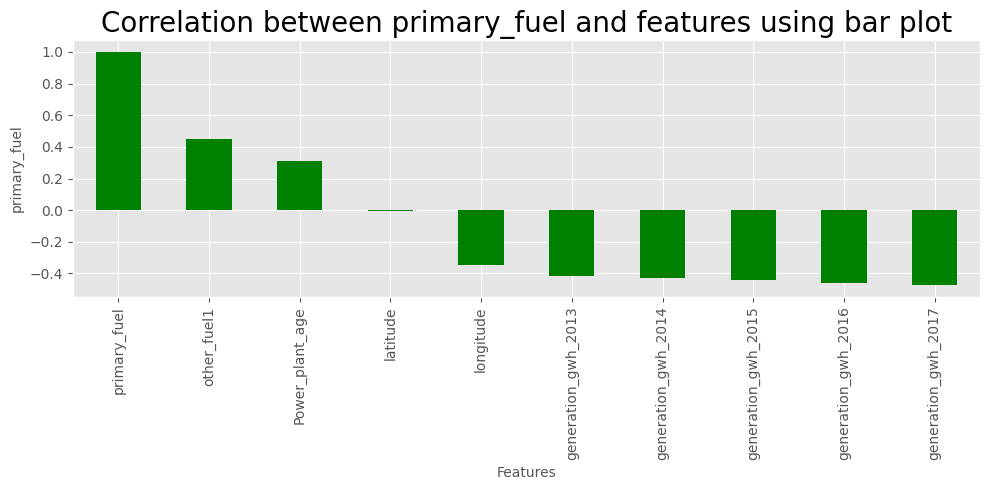

In [115]:
plt.figure(figsize=(10,5))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

#### Skewness

In [116]:
data.skew()

capacity_mw            1.916893
latitude              -0.131807
longitude              1.212556
primary_fuel           0.421089
other_fuel1           -1.840569
generation_gwh_2013    1.669040
generation_gwh_2014    1.623857
generation_gwh_2015    1.530908
generation_gwh_2016    1.604813
generation_gwh_2017    1.495215
Power_plant_age        1.014046
dtype: float64

In [117]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [118]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.932286,0.492496,NaN,NaN,NaN,NaN,NaN,-0.833031
1,-0.514929,0.492496,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413541,0.492496,NaN,NaN,NaN,NaN,NaN,NaN
3,2.178041,0.492496,-0.110987,-0.108987,0.123448,0.149212,-0.027733,-0.198032
5,-2.753369,-2.030073,0.043362,0.256249,0.333265,0.315123,0.279015,-0.273345


In [119]:
# checking skewness after using yeo-johnson
data.skew()

capacity_mw            1.916893
latitude              -0.131807
longitude              0.000859
primary_fuel           0.421089
other_fuel1           -1.540619
generation_gwh_2013   -0.104089
generation_gwh_2014   -0.131641
generation_gwh_2015   -0.143899
generation_gwh_2016   -0.137670
generation_gwh_2017   -0.154677
Power_plant_age       -0.074023
dtype: float64

In [120]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)

# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

##### Since we have done with EDA NOW its time for removal of missing data

In [121]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

# Machine Learning Model Building Classification

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

### Standard Scaling

In [123]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [124]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=58, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (657, 4)
Training target vector size: (657,)
Test feature matrix size: (219, 4)
Test target vector size: (219,)


#### Finding best Random state

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.5817490494296578 on Random_state 737


#### Logistics Regression Model

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.5817490494296578


Confusion matrix of Logistics Regression : 
 [[ 0  0  0  0  0  0  0  9]
 [ 0 48  0 19  0  0  7  2]
 [ 0  5  0  8  0  0  0  6]
 [ 0 14  0 50  0  0  5  6]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  0  1]
 [ 0  0  0  5  0  0 26  3]
 [ 0  2  0  3  0  0  9 29]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.70      0.63      0.66        76
           2       0.00      0.00      0.00        19
           3       0.55      0.67      0.60        75
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.55      0.76      0.64        34
           7       0.52      0.67      0.59        43

    accuracy                           0.58       263
   macro avg       0.29      0.34      0.31       

#### Decision Tree Classifier

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.6615969581749049


Confusion matrix of DecisionTreeClassifier : 
 [[ 7  1  0  0  0  0  0  1]
 [ 1 43  9 16  1  1  1  4]
 [ 0  5  6  4  1  2  0  1]
 [ 0  2 10 60  2  1  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  1  3  0  1  0  0]
 [ 1  0  0  0  0  0 26  7]
 [ 2  3  0  0  0  2  5 31]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.80      0.57      0.66        76
           2       0.22      0.32      0.26        19
           3       0.71      0.80      0.75        75
           4       0.00      0.00      0.00         2
           5       0.14      0.20      0.17         5
           6       0.81      0.76      0.79        34
           7       0.70      0.72      0.71        43

    accuracy                           0.66       263
   macro avg       0.50      0.52      0.5

#### Random Forest Classifier

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7452471482889734


Confusion matrix of RandomForestClassifier : 
 [[ 9  0  0  0  0  0  0  0]
 [ 1 53  4 13  0  0  2  3]
 [ 1  7  4  4  0  2  0  1]
 [ 0  3  3 68  0  0  1  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  1  2  0  2  0  0]
 [ 0  1  0  0  0  0 28  5]
 [ 5  0  0  0  0  0  6 32]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.56      1.00      0.72         9
           1       0.83      0.70      0.76        76
           2       0.31      0.21      0.25        19
           3       0.77      0.91      0.83        75
           4       0.00      0.00      0.00         2
           5       0.50      0.40      0.44         5
           6       0.76      0.82      0.79        34
           7       0.78      0.74      0.76        43

    accuracy                           0.75       263
   macro avg       0.56      0.60      0.5

#### ExtraTreesClassifier()

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.7642585551330798


Confusion matrix of ExtraTreesClassifier : 
 [[ 8  0  0  0  0  0  0  1]
 [ 0 54  2 15  0  0  3  2]
 [ 1  5  8  2  0  3  0  0]
 [ 1  4  3 65  0  0  1  1]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  1  2  0  2  0  0]
 [ 1  2  0  0  0  0 29  2]
 [ 3  1  0  0  0  0  4 35]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.57      0.89      0.70         9
           1       0.82      0.71      0.76        76
           2       0.53      0.42      0.47        19
           3       0.76      0.87      0.81        75
           4       0.00      0.00      0.00         2
           5       0.40      0.40      0.40         5
           6       0.78      0.85      0.82        34
           7       0.85      0.81      0.83        43

    accuracy                           0.76       263
   macro avg       0.59      0.62      0.60       

#### Crossvalidation

In [132]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.53409091 0.48       0.52571429 0.53142857 0.52      ]
Mean Score : 0.5182467532467533
Std deviation : 0.019730431593058796




Cross Validation Score DecisionTreeClassifier() :

Score : [0.70454545 0.65714286 0.75428571 0.69142857 0.68571429]
Mean Score : 0.6986233766233767
Std deviation : 0.031850934640023955




Cross Validation Score RandomForestClassifier() :

Score : [0.73863636 0.79428571 0.78285714 0.77142857 0.77142857]
Mean Score : 0.7717272727272727
Std deviation : 0.01859001884909156




Cross Validation Score ExtraTreesClassifier() :

Score : [0.74431818 0.76       0.8        0.77142857 0.76571429]
Mean Score : 0.7682922077922079
Std deviation : 0.01825037630989728




##### We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

### Hyper Parameter Tuning : GridSearchCV

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [135]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=aut

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [136]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 50}

### Final Classification Model

In [137]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=50, max_depth=10 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7490494296577946


In [139]:
from sklearn.metrics import roc_auc_score

In [140]:
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.923253 (macro),
0.931165 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.935664 (macro),
0.948229 (weighted by prevalence)


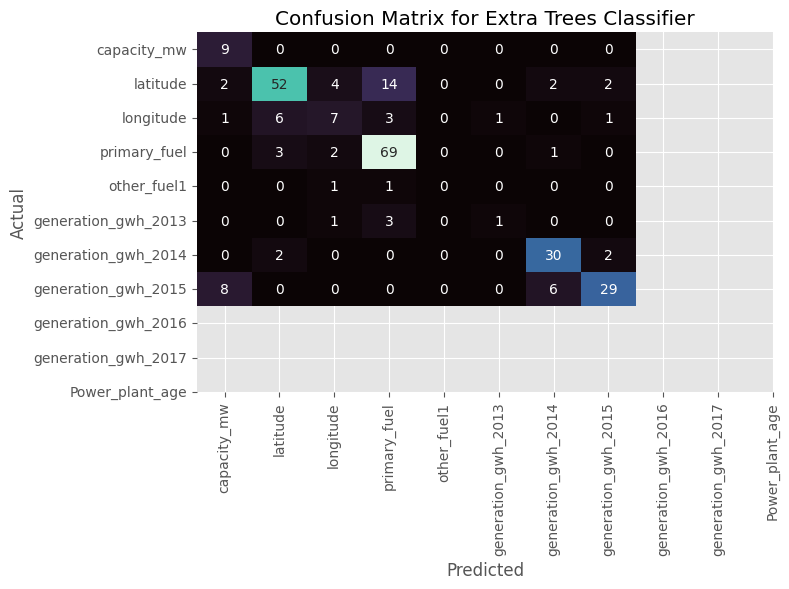

In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Final_mod is your trained model, and X_test and Y_test are your test data
y_pred = Final_mod.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='mako', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Extra Trees Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Saving Model

In [148]:
import joblib
joblib.dump(Final_mod,'powerplant_classification_Final.pkl')

['powerplant_classification_Final.pkl']

# Machine Learning Model Building Regression

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

#### Feature Engineering before proceeding

In [150]:
df2=df.copy()

In [151]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             660.000000
latitude                 19.212970
longitude                13.258160
primary_fuel              6.000000
other_fuel1               3.000000
generation_gwh_2013    4600.499035
generation_gwh_2014    5260.710000
generation_gwh_2015    5078.485600
generation_gwh_2016    5200.793260
generation_gwh_2017    5610.347700
Power_plant_age          39.000000
dtype: float64


In [152]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(876, 11)


In [153]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.932286,0.492496,NaN,NaN,NaN,NaN,NaN,-0.833031
1,-0.514929,0.492496,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413541,0.492496,NaN,NaN,NaN,NaN,NaN,NaN
3,2.178041,0.492496,-0.110987,-0.108987,0.123448,0.149212,-0.027733,-0.198032
5,-2.753369,-2.030073,0.043362,0.256249,0.333265,0.315123,0.279015,-0.273345


In [154]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)

# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [155]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

### Standard Scaling

In [156]:
# Splitting data in target and dependent feature
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']

In [157]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=550, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (613, 4)
Training target vector size: (613,)
Test feature matrix size: (263, 4)
Test target vector size: (263,)


In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.3085415629079189 on Random_state 664


### Linear Regression

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=91, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [ 3.10921778e+01  3.17349157e+00  2.12316709e+02 -9.17436813e+00
  1.21043520e+02  3.32184307e+02  3.28814127e+02  3.94013783e+02
  3.84049548e+02  4.84868184e+02  3.05379814e+02  4.61399219e+02
  1.72539123e+02  3.89214282e+02  3.89672380e+02  3.21041050e+02
 -6.35940381e-01  1.03082448e+02  2.11704691e+02 -2.19473705e+01
  1.49209190e+02  2.93086138e+02  3.71763371e+02  2.19560042e+02
  7.82935220e+01  7.11559787e+01 -1.87466054e+01  1.38376659e+01
  5.13172383e+02  2.88626812e+02  7.12025909e+01  1.45900756e+02
  2.38412599e+02  5.20227451e+02  2.65442321e+02  5.59284349e+02
  3.79252390e+02  2.95291092e+02  7.84715582e+01  3.47867739e+02
  3.85894485e+02  3.79080154e+02  1.03997583e+02  1.93148236e+02
  3.32092931e+02  3.57299529e+02  1.03287208e+02  5.74472747e+01
  5.37773415e+02  3.72622657e+00  1.33057791e+02  4.57653460e+02
 -1.81179439e+01  2.62295555e+02  2.26818166e+02  4.43037936e+02
  2.59760526e+02  1.40559743e+01  3.69695820e+02  4.52336743e+02
  2.7600

In [161]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 212.40439629109824
Mean squared error : 97193.95421536388
Root Mean Squared Error: 311.75944927999194


 R2 Score :
0.3038752481451291


### Applying other ML Models

In [162]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 136.35825626818817
Mean squared error : 53080.01930931016
Root Mean Squared Error: 230.39101395087042


 R2 Score :
0.6198290771433148


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 212.40454057164382
Mean squared error : 97194.13310884534
Root Mean Squared Error: 311.75973618933756


 R2 Score :
0.303873966870163


 Error of  DecisionTreeRegressor() :
Mean absolute error : 173.48939163498102
Mean squared error : 109212.80738361976
Root Mean Squared Error: 330.47361072197543


 R2 Score :
0.2177935443305753


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 166.59141478501635
Mean squared error : 58973.310294874456
Root Mean Squared Error: 242.84420992659977


 R2 Score :
0.5776200142643194


 Error of  GradientBoostingRegressor() :
Mean absolute error : 141.06615385211407
Mean squared error : 51167.17642870544
Root Mean Squared Error: 226.20162782063582


 R2 Score :
0.6335292839756018


 Error

In [163]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.5137026043813095


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.21533144393989723


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.1762911125860092


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.4598708574434311


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.4761450237813598


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_d

##### Among all Model GradientBoostingRegressor() gave us maximum R2 score and minimum RMSE value . So We will perform Hyper Parameter Tuning on Random Forest Regressor.

In [188]:
from sklearn.model_selection import GridSearchCV


In [189]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'loss': ['absolute_error'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [190]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameter,verbose = 5)

In [191]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END loss=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END loss=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END loss=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END loss=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END loss=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END loss=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 2/

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'loss': ['absolute_error'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 60, 80]},
             verbose=5)

In [192]:
GCV.best_params_

{'loss': 'absolute_error',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

## Final Regression Model

In [195]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=50 , max_depth= 20, max_features = 'log2',
             min_samples_leaf = 5, min_samples_split = 5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 142.36907318518357
Mean squared error : 51040.75302777256
Root Mean Squared Error: 225.9220065150196


 R2 Score of Final Model :
0.6344347565362515




 True Values Vs Predicted Value plot :


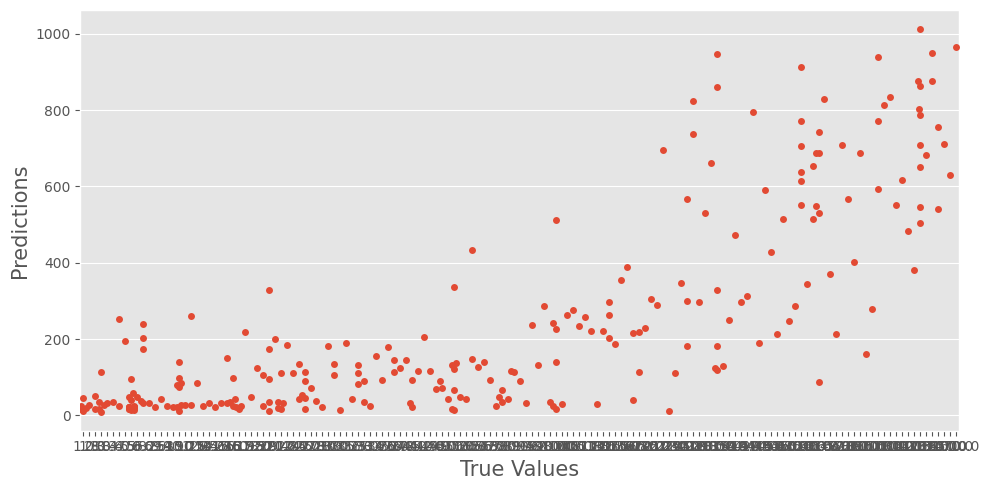

In [200]:
plt.figure(figsize=(10,5))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x = Y_test.round(2), y = y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()
plt.show()

## Final Regression Saving Model

In [201]:
import joblib
joblib.dump(Final_mod,'Powerplant_regression_Final.pkl')

['Powerplant_regression_Final.pkl']